# Part II: Model Development 2nd Pipeline


In this part, we develop three unique pipelines for predicting backorder. We use the smart sample from Part I to fit and evaluate these pipelines. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import os, sys
import itertools
import numpy as np
import pandas as pd

## Reload the smart sample here

In [2]:

# Reload your smart sampling from local file 
# ----------------------------------

import joblib

# Load the sampled data from the file
hitesh_df = joblib.load('undersample_df.pkl')



## Normalize/standardize the data if required; otherwise ignore. You can perform this step inside the pipeline (if required). 

In [3]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# #Normalizse the dat 

# normalized_data = scaler.fit_transform(hitesh_df)
# normalized_data


In [4]:
# #Checking if the data is normalised 

# import numpy as np

# normalized_data = scaler.fit_transform(hitesh_df)

# print("Mean:", np.mean(normalized_data, axis=0))
# print("Standard deviation:", np.std(normalized_data, axis=0)) #As mean is close to 0 and SD is close to 1 we can say that the data is normalized 



In [5]:
# import pandas as pd

# normalized_df = pd.DataFrame(normalized_data, columns=hitesh_df.columns)

# normalized_df.describe()

## Split the data into Train/Test

In [6]:
X = hitesh_df.iloc [:, :-1]
y = hitesh_df.went_on_backorder

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)



In [8]:
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator

### 2nd pipeline


In [10]:
X_train2 = X_train 
y_train2 = y_train

In [17]:
# Add anomaly detection code  (Question #E205)
# ----------------------------------

#Elliptic Envelope 

envelope = EllipticEnvelope(support_fraction=1, contamination=0.08)  # Set the desired contamination level
envelope.fit(X_train2)

# Predict outliers
outliers = envelope.predict(X_train2) == -1  # Returns a boolean array with True for outliers

# Print number of outliers and the indices of the outliers
print(f"Number of outliers: {sum(outliers)}")

X_env = X_train2[~outliers]
y_env = y_train2[~outliers]


Number of outliers: 1317


In [26]:
# Add codes for feature selection and classification pipeline with grid search  (Question #E206)
# ----------------------------------

pipe1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('fa', FactorAnalysis()),
    ('rf', RandomForestClassifier())                 
])

In [27]:
# Configuring the parameters for grid search 

param_grid1 = {
    'fa__n_components': [10, 20, 30, 40],
    'rf__n_estimators': [200, 400, 600, 800],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10]
}

In [28]:
# Given an unbiased evaluation  (Question #E207)
# ----------------------------------

from sklearn.model_selection import GridSearchCV

model_grid2 = GridSearchCV(pipe1, param_grid1, cv = 2, n_jobs = 5)
model_grid2.fit(X_env, y_env)


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('fa', FactorAnalysis()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=5,
             param_grid={'fa__n_components': [10, 20, 30, 40],
                         'rf__max_depth': [None, 5, 10],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [200, 400, 600, 800]})

In [31]:
y_pred1 = model_grid2.predict(X_test)
print(classification_report (y_test, y_pred1))



              precision    recall  f1-score   support

           0       0.90      0.85      0.87      2743
           1       0.85      0.90      0.88      2742

    accuracy                           0.87      5485
   macro avg       0.88      0.87      0.87      5485
weighted avg       0.88      0.87      0.87      5485



In [32]:
model_grid2.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('fa', FactorAnalysis(n_components=30)),
                ('rf', RandomForestClassifier(n_estimators=800))])

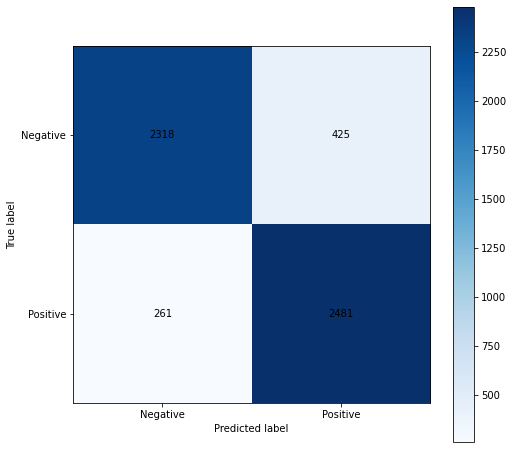

In [38]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred1)

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 8))

# Plot confusion matrix as heatmap with labels
im = ax.imshow(conf_mat, cmap='Blues')

# Add colorbar and labels
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Add values to heatmap
for i in range(len(conf_mat)):
    for j in range(len(conf_mat[0])):
        ax.text(j, i, conf_mat[i][j], ha='center', va='center', color='black')

plt.show()

#### <center>Recording the optimal hyperparameters and performance resulting from this pipeline.</center>